# 6.6 Sourcing & Analyzing Time Series Data

In [656]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings

from statsmodels.tsa.seasonal import seasonal_decompose


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [658]:
# Changing the format of the values visualization

pd.options.display.float_format = '{:.2f}'.format

# Reseting the maximum number of columns to display to default (all columns)

pd.set_option('display.max_columns', None)

In [660]:
# Importing data
path = r'C:\Users\IVON6\Chocolate Bar Ratings Analysis'
df_clean_data = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_choco_merged_columns.csv'))

In [661]:
df_clean_data.head()

,ID,reference_number,company,company_location,review_date,bean_origin,bar_name,cocoa_percent,ingredients,taste,rating,num_ingredients,Cocoa_Percent_Range
0,0,999,Bahen & Co.,Australia,2012,Blend,Houseblend,70,"2- B,S","chalky, fragrant, then off",2.50,2,70-80%
1,1,999,Bahen & Co.,Australia,2012,Blend,Houseblend,70,"2- B,S","chalky, fragrant, then off",2.50,2,70-80%
2,2,999,Bahen & Co.,Australia,2012,Blend,Houseblend,70,"2- B,S","chalky, fragrant, then off",2.50,2,70-80%
3,3,999,Bahen & Co.,Australia,2012,Blend,Houseblend,70,"2- B,S","chalky, fragrant, then off",2.50,2,70-80%
4,4,999,Bahen & Co.,Australia,2012,Blend,Houseblend,70,"2- B,S","chalky, fragrant, then off",2.50,2,70-80%


### Subsetting and cleaning time-series data

In [665]:
#drop unnamed column

df_clean_data.drop('ID', axis=1, inplace=True)

In [667]:
df_clean_data.head()

,reference_number,company,company_location,review_date,bean_origin,bar_name,cocoa_percent,ingredients,taste,rating,num_ingredients,Cocoa_Percent_Range
0,999,Bahen & Co.,Australia,2012,Blend,Houseblend,70,"2- B,S","chalky, fragrant, then off",2.50,2,70-80%
1,999,Bahen & Co.,Australia,2012,Blend,Houseblend,70,"2- B,S","chalky, fragrant, then off",2.50,2,70-80%
2,999,Bahen & Co.,Australia,2012,Blend,Houseblend,70,"2- B,S","chalky, fragrant, then off",2.50,2,70-80%
3,999,Bahen & Co.,Australia,2012,Blend,Houseblend,70,"2- B,S","chalky, fragrant, then off",2.50,2,70-80%
4,999,Bahen & Co.,Australia,2012,Blend,Houseblend,70,"2- B,S","chalky, fragrant, then off",2.50,2,70-80%


In [669]:
df_clean_data.dtypes

reference_number         int64
company                 object
company_location        object
review_date              int64
bean_origin             object
bar_name                object
cocoa_percent            int64
ingredients             object
taste                   object
rating                 float64
num_ingredients          int64
Cocoa_Percent_Range     object
dtype: object

In [671]:
df_clean_data['review_date'] = df_clean_data['review_date'].astype(str)

In [673]:
df_clean_data.dtypes

reference_number         int64
company                 object
company_location        object
review_date             object
bean_origin             object
bar_name                object
cocoa_percent            int64
ingredients             object
taste                   object
rating                 float64
num_ingredients          int64
Cocoa_Percent_Range     object
dtype: object

In [675]:
# Null analysis
df_clean_data.isnull().sum()

reference_number       0
company                0
company_location       0
review_date            0
bean_origin            0
bar_name               0
cocoa_percent          0
ingredients            0
taste                  0
rating                 0
num_ingredients        0
Cocoa_Percent_Range    0
dtype: int64

In [677]:
df_clean_data.describe()

,reference_number,cocoa_percent,rating,num_ingredients
count,469023.00,469023.00,469023.00,469023.00
mean,1160.81,71.28,3.13,3.02
std,670.61,5.43,0.44,1.00
min,5.00,42.00,1.00,1.00
25%,576.00,70.00,2.75,2.00
50%,1141.00,70.00,3.00,3.00
75%,1618.00,74.00,3.50,4.00
max,2876.00,100.00,4.00,6.00


In [679]:
df_clean_data.shape

(469023, 12)

In [681]:
print(f'The column names are: {list(df_clean_data.columns)}.\n')

The column names are: ['reference_number', 'company', 'company_location', 'review_date', 'bean_origin', 'bar_name', 'cocoa_percent', 'ingredients', 'taste', 'rating', 'num_ingredients', 'Cocoa_Percent_Range'].



In [683]:
for col in list(df_clean_data.columns):
  print(f'The unique value of column "{col}" are: {df_clean_data[col].nunique()}.')

The unique value of column "reference_number" are: 671.
The unique value of column "company" are: 616.
The unique value of column "company_location" are: 67.
The unique value of column "review_date" are: 18.
The unique value of column "bean_origin" are: 64.
The unique value of column "bar_name" are: 1716.
The unique value of column "cocoa_percent" are: 42.
The unique value of column "ingredients" are: 23.
The unique value of column "taste" are: 2650.
The unique value of column "rating" are: 12.
The unique value of column "num_ingredients" are: 6.
The unique value of column "Cocoa_Percent_Range" are: 6.


In [685]:
# Group by 'review_date' and calculate the mean value for each date
df_choco_reviewdate = df_clean_data.groupby('review_date')['rating'].mean().reset_index()

print(df_choco_reviewdate)

   review_date  rating
0         2006    3.69
1         2007    3.34
2         2008    3.49
3         2009    3.15
4         2010    3.03
5         2011    3.24
6         2012    2.98
7         2013    2.98
8         2014    3.08
9         2015    3.19
10        2016    3.01
11        2017    3.26
12        2018    3.10
13        2019    2.96
14        2020    3.07
15        2021    3.17
16        2022    3.04
17        2023    3.20


In [687]:
df_choco_reviewdate.describe()

,rating
count,18.00
mean,3.16
std,0.19
min,2.96
25%,3.03
50%,3.12
75%,3.23
max,3.69


In [689]:
# Set the "review_ate" column as the index

df_choco_reviewdate['datetime'] = pd.to_datetime(df_choco_reviewdate['review_date']) # Create a datetime column from "Date.""
df_choco_reviewdate = df_choco_reviewdate.set_index('datetime') # Set the datetime as the index of the dataframe.
df_choco_reviewdate.drop(['review_date'], axis=1, inplace=True) # Drop the "Date" column.

print(df_choco_reviewdate)

            rating
datetime          
2006-01-01    3.69
2007-01-01    3.34
2008-01-01    3.49
2009-01-01    3.15
2010-01-01    3.03
2011-01-01    3.24
2012-01-01    2.98
2013-01-01    2.98
2014-01-01    3.08
2015-01-01    3.19
2016-01-01    3.01
2017-01-01    3.26
2018-01-01    3.10
2019-01-01    2.96
2020-01-01    3.07
2021-01-01    3.17
2022-01-01    3.04
2023-01-01    3.20


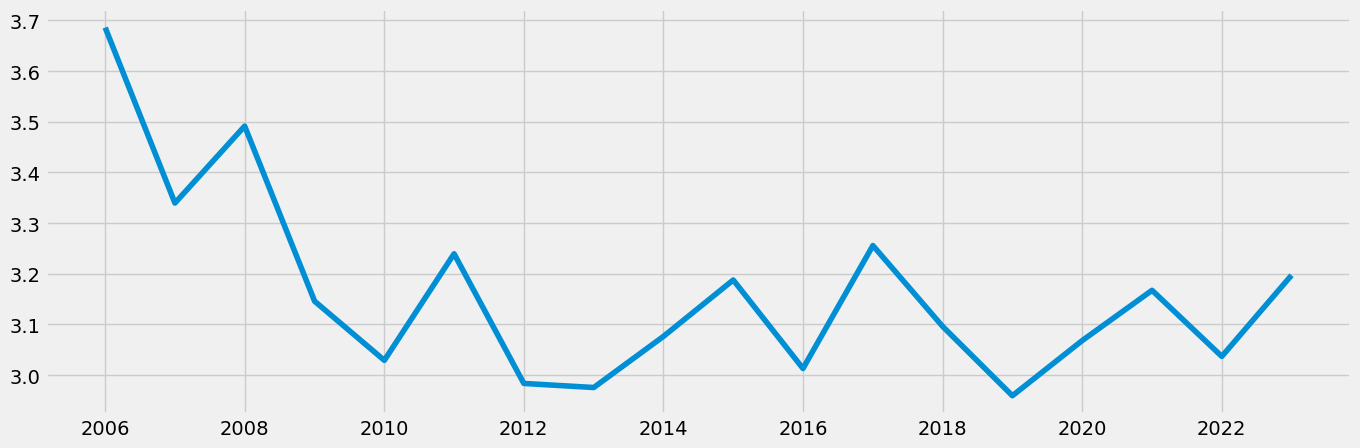

In [691]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_choco_reviewdate)

### 3. Time-series analysis: decomposition

In [694]:
# Decompose the data's components
decomposition = sm.tsa.seasonal_decompose(df_choco_reviewdate, model = 'additive')


In [696]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

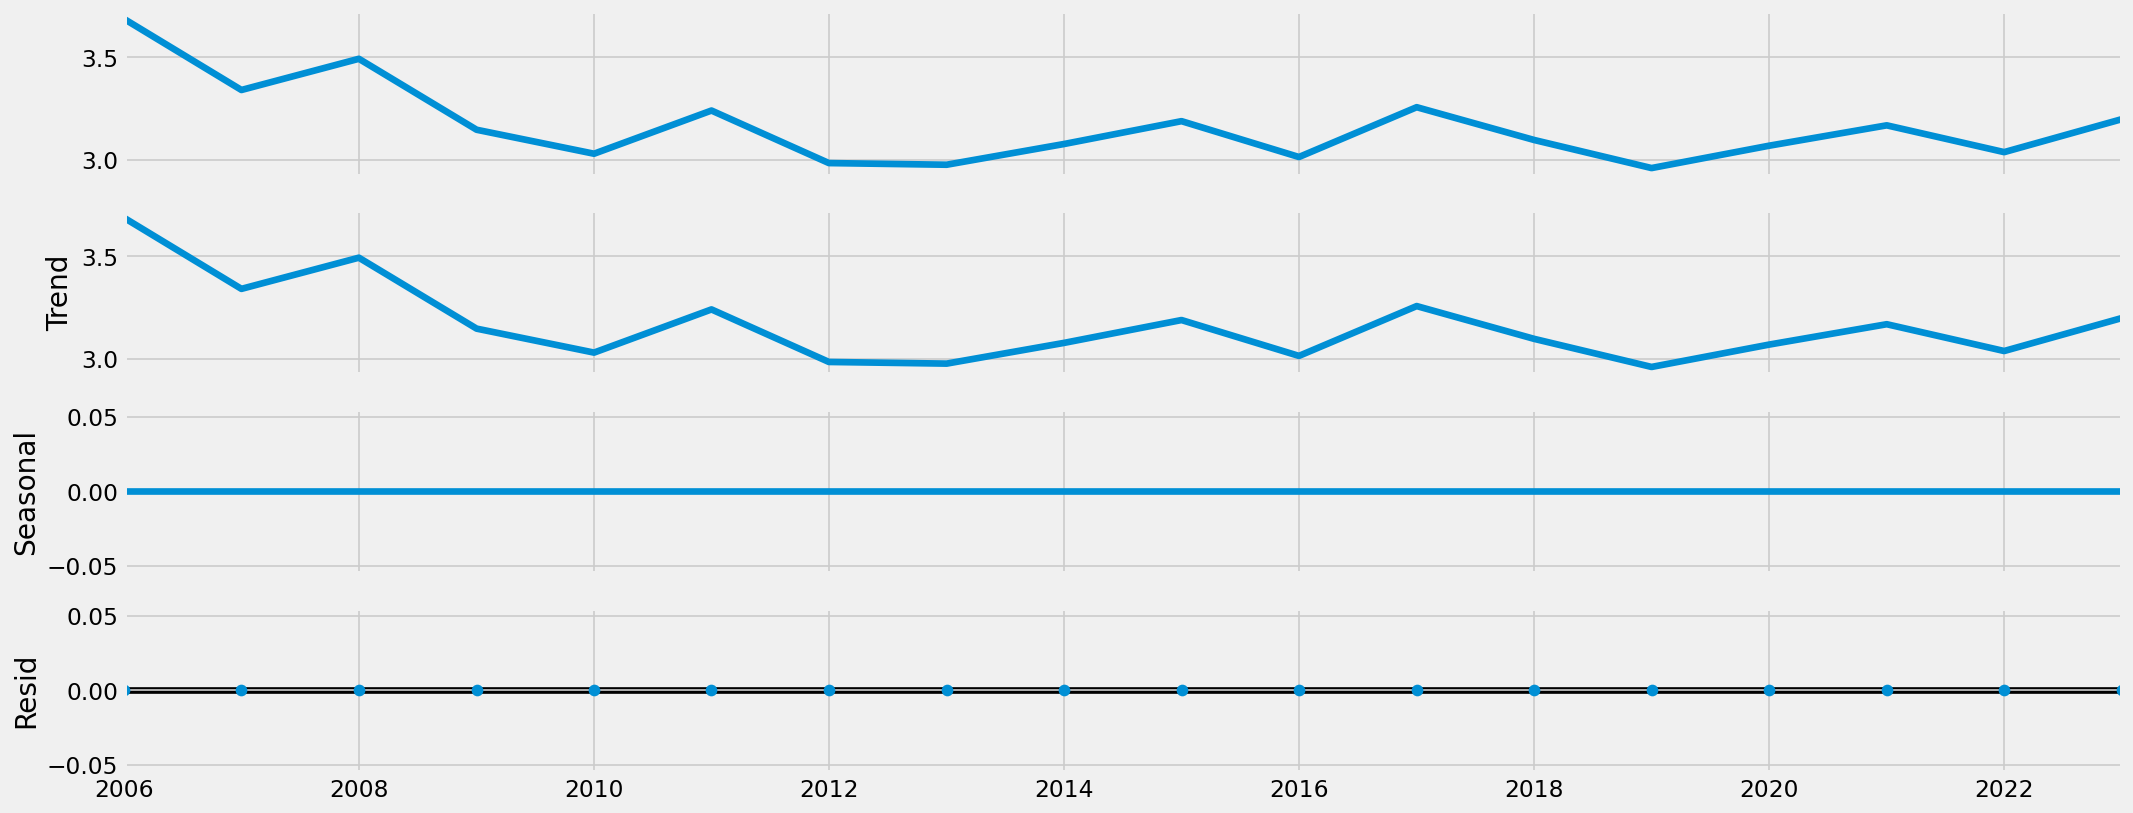

In [698]:
# Plot the separated components

decomposition.plot()
plt.show()

### Insights:

- The first chart is the level. This is just the data itself including all its components. 

- The second chart is the trend. It fluctuates over time. The trend line compared to the level are very similar.

- The third chart is the seasonality. There is seasonality in this data.

- The 4th chart is the noise or "residual". There isn't unexplained noise.

### Testing for stationarity

In [702]:
# Conduct a Dickey-Fuller test to check for stationarity

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): 
    print('Dickey-Fuller Stationarity Test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key, value in test[4].items():
        result['Critical Value (%s)'%key] = value
    print(result)

# Apply the test on the time series
dickey_fuller(df_choco_reviewdate['rating'])

Dickey-Fuller Stationarity Test:
Test Statistic                -9.79
p-value                        0.00
Number of Lags Used            7.00
Number of Observations Used   10.00
Critical Value (1%)           -4.33
Critical Value (5%)           -3.23
Critical Value (10%)          -2.75
dtype: float64


### Comparing the test statistic to the critical value of the corresponding significance level. The test statistic is smaller than the critical value, I can reject the null hypothesis. Data is Stationary.

### Check for autocorrelations

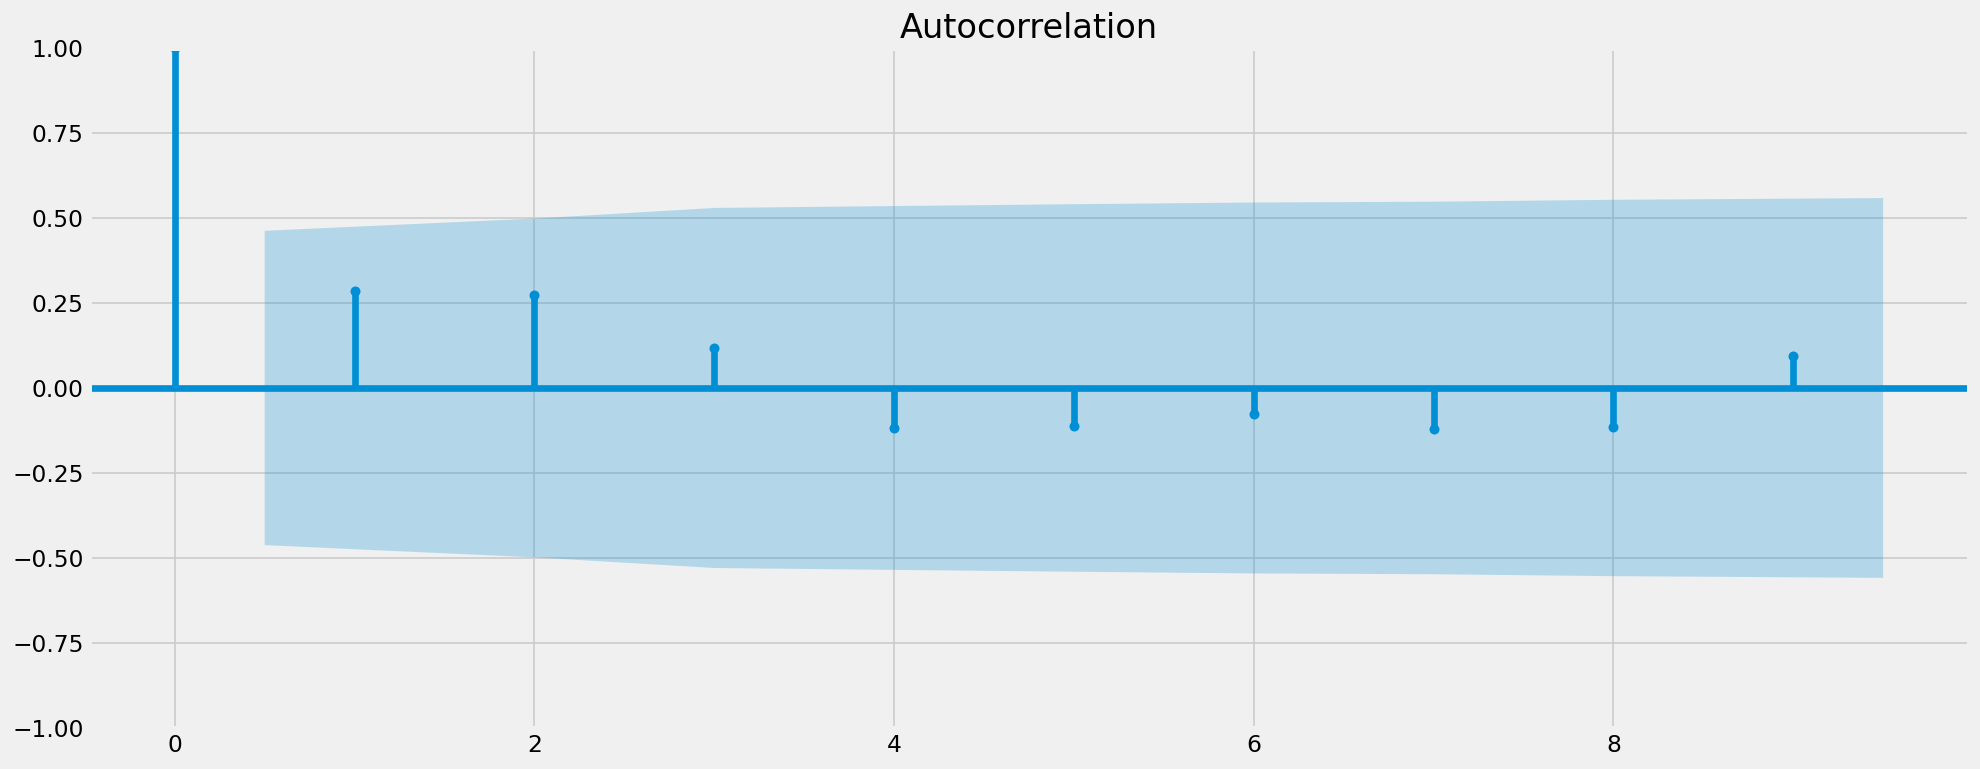

In [706]:
# Check out a plot of autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_choco_reviewdate)
plt.show()

In [708]:
# I have 1 lag that are above the confidence interval, which means the data is not perfectly stationnary. 
# It is, however, a small enough number of lags, and no differencing is necessary.

#### Univariate Time Series Forecasting - Bonus

In [711]:
df_choco_reviewdate.head()

,rating
datetime,
2006-01-01,3.69
2007-01-01,3.34
2008-01-01,3.49
2009-01-01,3.15
2010-01-01,3.03


In [713]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df_choco_reviewdate.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -9.786089
p-value: 0.000000


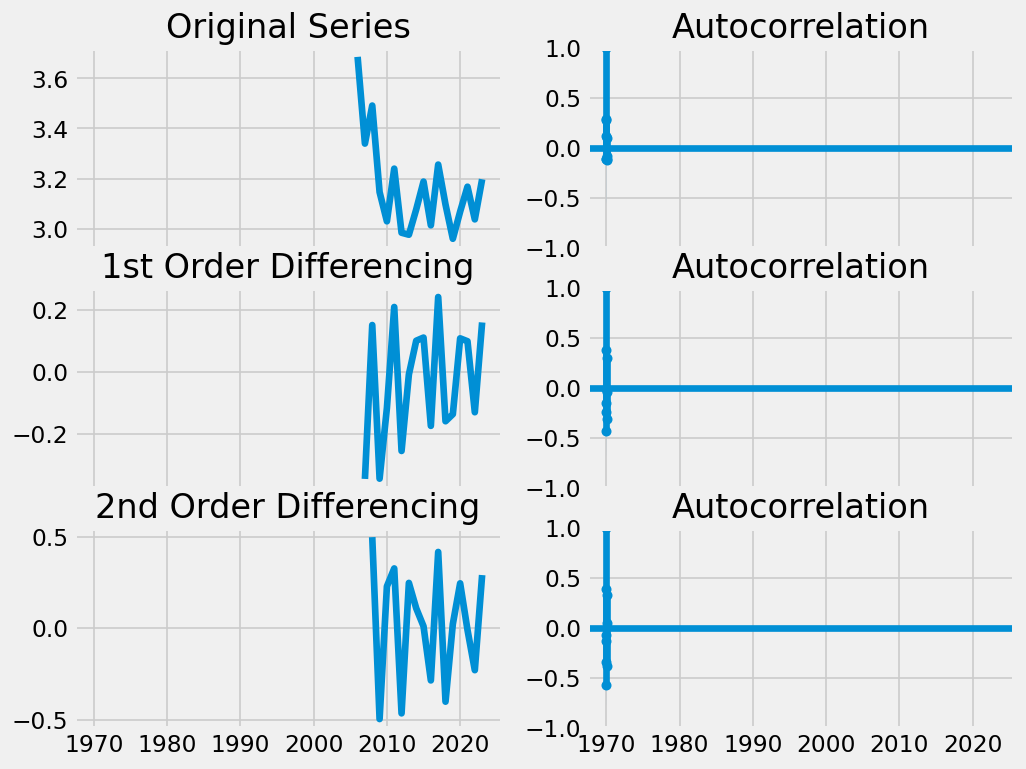

In [715]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df_choco_reviewdate); axes[0, 0].set_title('Original Series')
plot_acf(df_choco_reviewdate, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df_choco_reviewdate.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df_choco_reviewdate.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df_choco_reviewdate.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df_choco_reviewdate.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

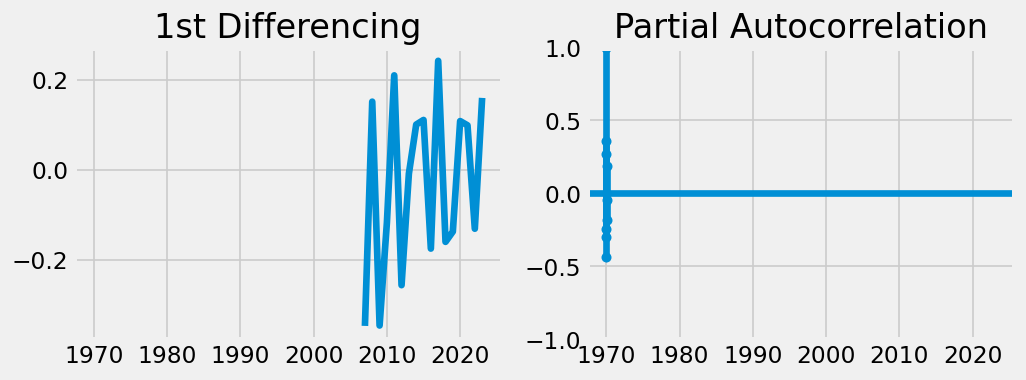

In [717]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df_choco_reviewdate.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df_choco_reviewdate.diff().dropna(), ax=axes[1])

plt.show()

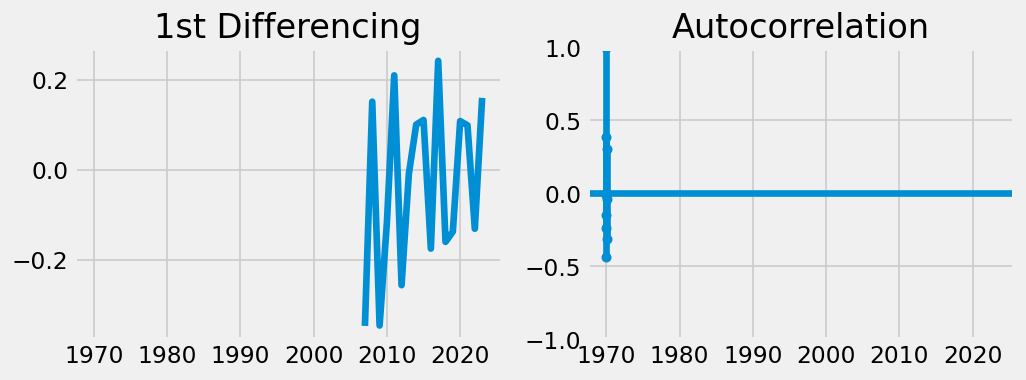

In [719]:
# How to find the order of the MA term (q)

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df_choco_reviewdate.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df_choco_reviewdate.diff().dropna(), ax=axes[1])

plt.show()

In [721]:
# build the ARIMA Model

from statsmodels.tsa.arima.model import ARIMA

# ARIMA order (p,d,q)
model = ARIMA(df_choco_reviewdate, order=(1,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 rating   No. Observations:                   18
Model:                 ARIMA(1, 1, 2)   Log Likelihood                   7.540
Date:                Tue, 12 Nov 2024   AIC                             -7.079
Time:                        16:19:32   BIC                             -3.746
Sample:                    01-01-2006   HQIC                            -6.748
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3207      0.632      0.507      0.612      -0.919       1.560
ma.L1         -0.9051      0.797     -1.136      0.256      -2.467       0.656
ma.L2          0.6763      0.554      1.220      0.2

In [723]:
# 1,1,1 ARIMA Model
model = ARIMA(df_choco_reviewdate, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 rating   No. Observations:                   18
Model:                 ARIMA(1, 1, 1)   Log Likelihood                   6.308
Date:                Tue, 12 Nov 2024   AIC                             -6.616
Time:                        16:19:32   BIC                             -4.116
Sample:                    01-01-2006   HQIC                            -6.367
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3710      0.460     -0.806      0.420      -1.273       0.531
ma.L1         -0.1806      0.574     -0.315      0.753      -1.306       0.944
sigma2         0.0274      0.015      1.842      0.0

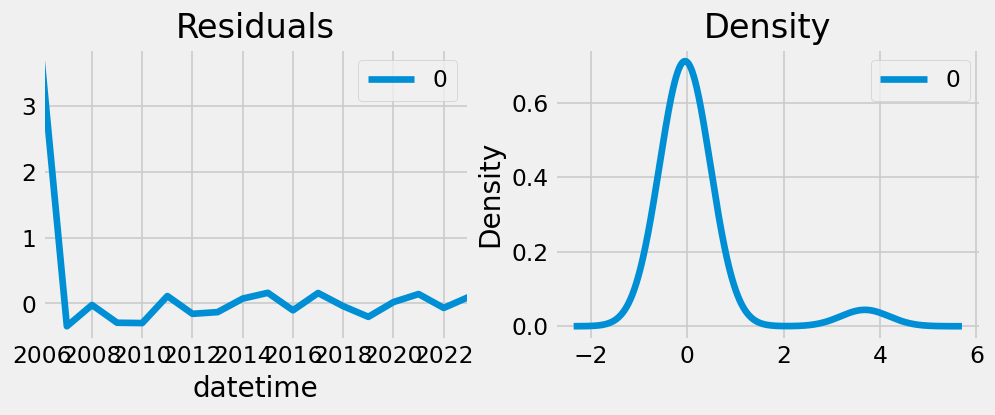

In [725]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

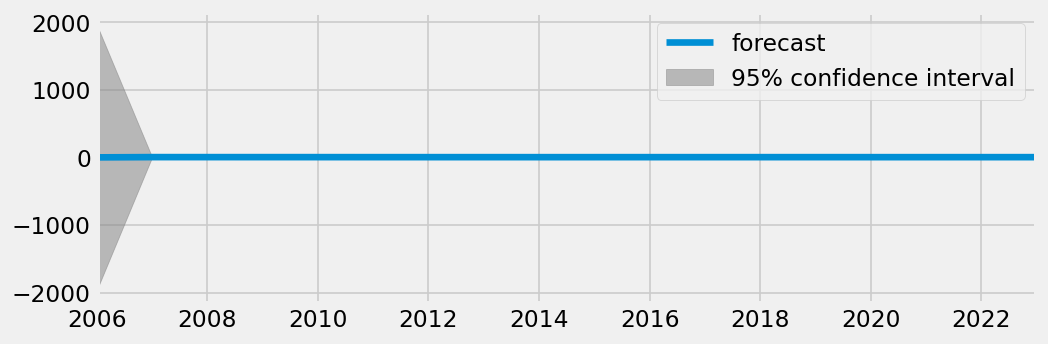

In [727]:
# Actual vs Fitted

plot_predict(model_fit, dynamic=False)
plt.show()

In [729]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df_choco_reviewdate[:85]
test = df_choco_reviewdate[85:]

In [731]:
test.shape

(0, 1)

In [733]:
train.shape

(18, 1)

### Running and Fitting the Model

In [748]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit()  

# Forecast
fc, se, conf = fitted.forecast(4, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

ValueError: too many values to unpack (expected 3)